# Binary Classification - 분류

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 실습용 데이터 설정
* Default.csv

In [2]:
!ls -l

total 296
-rw-r--r-- 1 root root 296176 Aug  6 10:51 Default.csv
drwxr-xr-x 1 root root   4096 Jul 30 16:30 sample_data


* pandas DataFrame

In [3]:
import pandas as pd

DF = pd.read_csv('Default.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [4]:
DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


# I. 탐색적 데이터 분석

> ## 1) 빈도분석

In [5]:
DF.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

> ## 2) 분포 시각화

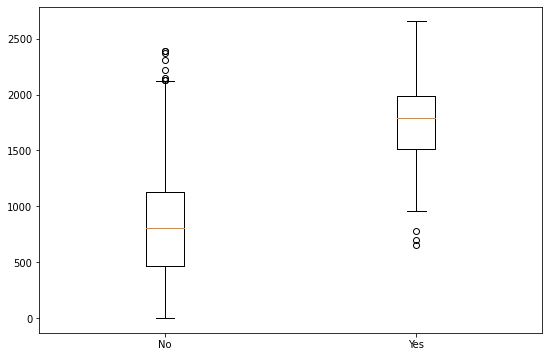

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.boxplot([DF[DF.default == 'No'].balance,
             DF[DF.default == 'Yes'].balance],
            labels = ['No', 'Yes'])
plt.show()

# II. Data Preprocessing

> ## 1) Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

X = DF[['balance']]
y = DF['default']

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

X_Scaled

array([[-0.21883482],
       [-0.03761593],
       [ 0.49241019],
       ...,
       [ 0.02075107],
       [ 1.51674204],
       [-1.31169066]])

> ## 2) Train & Test Split

* 7: 3

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7000, 1) (7000,)
Test Data :  (3000, 1) (3000,)


# III. Modeling

> ## 1) Train_Data로 모델 생성

In [10]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

> ## 2) Test_Data에 Model 적용

In [11]:
y_hat = Model_lr.predict(X_test)

In [12]:
y_hat

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [13]:
y_test

8110    No
4085    No
4219    No
1956    No
62      No
        ..
2537    No
180     No
5219    No
4471    No
1915    No
Name: default, Length: 3000, dtype: object

> ## 3) Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[2889,    7],
       [  72,   32]])

> ## 4) Accuracy, Precision, Recall - 'No(상환)'

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'No'))
print(recall_score(y_test, y_hat, pos_label = 'No'))

0.9736666666666667
0.9756838905775076
0.9975828729281768


> ## 5) Accuracy, Precision, Recall - 'Yes(연체)'

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Yes'))
print(recall_score(y_test, y_hat, pos_label = 'Yes'))

0.9736666666666667
0.8205128205128205
0.3076923076923077


> ## 6) F1_Score - 'No(상환)'

In [17]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'No')

0.9865118661430767

> ## 7) F1_Score - 'Yes(연체)'

In [18]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'Yes')

0.44755244755244755

# 
# 
# 
# The End
# 
# 
# 